<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Maximum-Return-Portfolio" data-toc-modified-id="Maximum-Return-Portfolio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Maximum Return Portfolio</a></span></li><li><span><a href="#Minimum-Risk-Portfolio" data-toc-modified-id="Minimum-Risk-Portfolio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Minimum Risk Portfolio</a></span></li><li><span><a href="#Maximum-Sharpe-Portfolio" data-toc-modified-id="Maximum-Sharpe-Portfolio-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Maximum Sharpe Portfolio</a></span></li></ul></div>

In [1]:
import pandas_datareader.data as web
import numpy as np, pandas as pd, scipy as sp
import scipy.optimize as sco
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
p = print

In [3]:
import cvxpy as cp
import scipy as sp
from scipy import sparse

In [4]:
tickers = ['M','CVS', 'GS', 'NFLX', 'HPE']
data = web.DataReader(tickers,'yahoo','01/01/2016','10/18/2019')['Adj Close']
returns = data.pct_change().dropna()
mean_return = returns.mean()
return_stdev = returns.std()
cov_matrix = returns.cov()
rf = 0.00003

In [160]:
tickers.sort()
tickers

['CVS', 'GS', 'HPE', 'M', 'NFLX']

In [62]:
# Data for long only portfolio optimization
n = len(tickers)
mu = np.asarray(returns.mean() * 252)
Sigma = np.asarray(returns.cov() * 252)

In [63]:
mu.shape

(5,)

In [64]:
(mu.T).shape

(5,)

In [65]:
Sigma.shape

(5, 5)

In [66]:
weights = cp.Variable(len(tickers))

In [67]:
weights.shape

(5,)

In [68]:
ret = (weights.T * mu)
ret

Expression(AFFINE, UNKNOWN, ())

In [69]:
ret.shape

()

In [102]:
risk = cp.sqrt(cp.quad_form(weights, Sigma))
risk

Expression(QUASICONVEX, NONNEGATIVE, (1, 1))

In [71]:
risk.shape

(1, 1)

In [72]:
risk.is_dcp

<bound method Expression.is_dcp of Expression(QUASICONVEX, NONNEGATIVE, (1, 1))>

In [73]:
constraints = [cp.sum(weights) == 1, weights >= 0]
constraints

[Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())),
 Inequality(Constant(CONSTANT, ZERO, ()))]

## Maximum Return Portfolio

In [145]:
# objective = cp.Maximize(cp.matrix_frac(ret.T, risk))

In [146]:
objective = cp.Maximize(ret)

In [147]:
objective.is_dcp

<bound method Maximize.is_dcp of Maximize(Expression(AFFINE, UNKNOWN, ()))>

In [148]:
prob = cp.Problem(objective, constraints)

In [149]:
prob.solve()

0.32022244923843785

In [151]:
tickers

['CVS', 'GS', 'HPE', 'M', 'NFLX']

In [150]:
weights.value

array([-1.95136763e-28, -1.95535045e-28, -1.95950276e-28, -1.94989622e-28,
        1.00000000e+00])

In [157]:
returns = data.pct_change().dropna()
returns.mean()

Symbols
CVS    -0.000167
GS      0.000338
HPE     0.000866
M      -0.000354
NFLX    0.001271
dtype: float64

In [153]:
normalize_return = data / data.iloc[0]
normalize_return.head()

Symbols,CVS,GS,HPE,M,NFLX
Date,,,,,
2016-01-04,1.000000,1.000000,1.000000,1.000000,1.000000
2016-01-05,1.002903,0.982782,0.993391,1.032691,0.979083
2016-01-06,0.990670,0.958790,0.978189,1.010059,1.070207
2016-01-07,0.976363,0.929321,0.906147,1.030735,1.041833
2016-01-08,0.969936,0.925483,0.894911,1.002794,1.013005


In [154]:
allocation = normalize_return * weights.value
allocation.head()

Symbols,CVS,GS,HPE,M,NFLX
Date,,,,,
2016-01-04,-1.951368e-28,-1.955350e-28,-1.959503e-28,-1.949896e-28,1.000000
2016-01-05,-1.957032e-28,-1.921683e-28,-1.946552e-28,-2.013639e-28,0.979083
2016-01-06,-1.933160e-28,-1.874770e-28,-1.916764e-28,-1.969510e-28,1.070207
2016-01-07,-1.905244e-28,-1.817149e-28,-1.775597e-28,-2.009826e-28,1.041833
2016-01-08,-1.892702e-28,-1.809643e-28,-1.753580e-28,-1.955344e-28,1.013005


In [158]:
capital = 100000
portfolio_value = allocation * capital
portfolio_value.head()

Symbols,CVS,GS,HPE,M,NFLX
Date,,,,,
2016-01-04,-1.951368e-23,-1.955350e-23,-1.959503e-23,-1.949896e-23,100000.000000
2016-01-05,-1.957032e-23,-1.921683e-23,-1.946552e-23,-2.013639e-23,97908.334448
2016-01-06,-1.933160e-23,-1.874770e-23,-1.916764e-23,-1.969510e-23,107020.735981
2016-01-07,-1.905244e-23,-1.817149e-23,-1.775597e-23,-2.009826e-23,104183.338043
2016-01-08,-1.892702e-23,-1.809643e-23,-1.753580e-23,-1.955344e-23,101300.473188


In [159]:
tickers

['CVS', 'GS', 'HPE', 'M', 'NFLX']

In [161]:
portfolio_value.columns = [ticker + ' Position' for ticker in tickers]
portfolio_value.head()

,CVS Position,GS Position,HPE Position,M Position,NFLX Position
Date,,,,,
2016-01-04,-1.951368e-23,-1.955350e-23,-1.959503e-23,-1.949896e-23,100000.000000
2016-01-05,-1.957032e-23,-1.921683e-23,-1.946552e-23,-2.013639e-23,97908.334448
2016-01-06,-1.933160e-23,-1.874770e-23,-1.916764e-23,-1.969510e-23,107020.735981
2016-01-07,-1.905244e-23,-1.817149e-23,-1.775597e-23,-2.009826e-23,104183.338043
2016-01-08,-1.892702e-23,-1.809643e-23,-1.753580e-23,-1.955344e-23,101300.473188


In [163]:
portfolio_value['Total Position'] = np.sum(portfolio_value, axis=1)
portfolio_value.head()

,CVS Position,GS Position,HPE Position,M Position,NFLX Position,Total Position
Date,,,,,,
2016-01-04,-1.951368e-23,-1.955350e-23,-1.959503e-23,-1.949896e-23,100000.000000,100000.000000
2016-01-05,-1.957032e-23,-1.921683e-23,-1.946552e-23,-2.013639e-23,97908.334448,97908.334448
2016-01-06,-1.933160e-23,-1.874770e-23,-1.916764e-23,-1.969510e-23,107020.735981,107020.735981
2016-01-07,-1.905244e-23,-1.817149e-23,-1.775597e-23,-2.009826e-23,104183.338043,104183.338043
2016-01-08,-1.892702e-23,-1.809643e-23,-1.753580e-23,-1.955344e-23,101300.473188,101300.473188


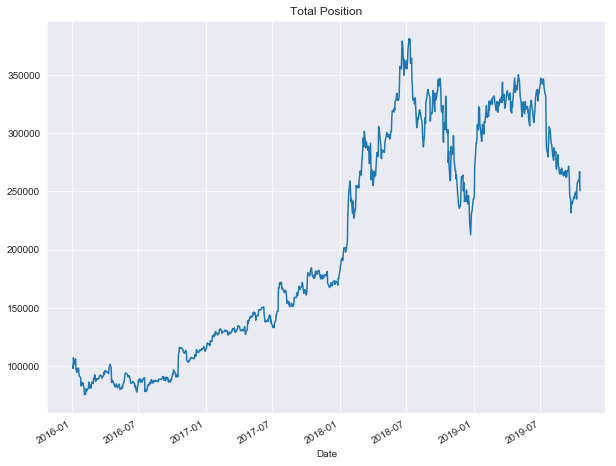

In [166]:
portfolio_value['Total Position'].plot(figsize=(10,8), title='Total Position');

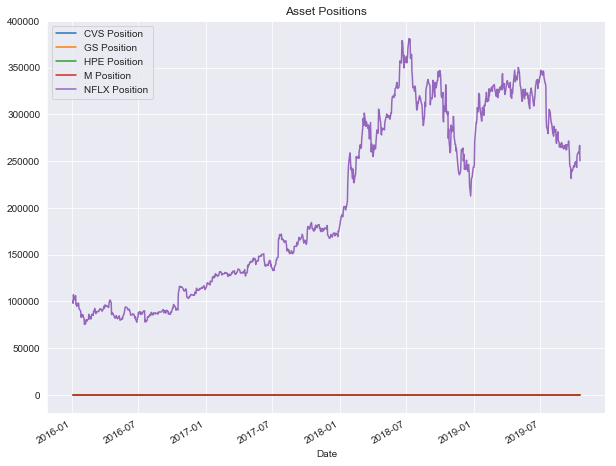

In [168]:
portfolio_value.drop(['Total Position'], axis=1).plot(figsize=(10,8), title='Asset Positions');

## Minimum Risk Portfolio

In [103]:
risk.is_dcp

<bound method Expression.is_dcp of Expression(QUASICONVEX, NONNEGATIVE, (1, 1))>

In [76]:
objective = cp.Minimize(risk)
objective

Minimize(Expression(QUASICONVEX, NONNEGATIVE, (1, 1)))

In [77]:
objective.is_dcp()

False

In [78]:
prob = cp.Problem(objective, constraints)

In [79]:
prob

Problem(Minimize(Expression(QUASICONVEX, NONNEGATIVE, (1, 1))), [Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, ZERO, ()))])

In [84]:
# Volatility of minimum risk portfolio
prob.solve( qcp=True)

0.18819570541381836

In [83]:
# Weights of minimum risk portfolio
weights.value

array([0.38937143, 0.30224439, 0.14621311, 0.08510487, 0.0770662 ])

In [169]:
tickers

['CVS', 'GS', 'HPE', 'M', 'NFLX']

## Maximum Sharpe Portfolio

In [107]:
sharpe = cp.log(ret) - cp.log(risk)

In [140]:
sharpe = (cp.log(ret) - cp.log(risk))

In [141]:
sharpe

Expression(UNKNOWN, UNKNOWN, (1, 1))

In [142]:
sharpe.is_dcp

<bound method Expression.is_dcp of Expression(UNKNOWN, UNKNOWN, (1, 1))>

In [129]:
objective = cp.Maximize(sharpe)

In [132]:
objective.is_dgp

<bound method Maximize.is_dgp of Maximize(Expression(AFFINE, UNKNOWN, ()))>

In [133]:
prob = cp.Problem(objective, constraints)

In [134]:
prob.solve()

0.32022244923843785

In [135]:
tickers

['CVS', 'GS', 'HPE', 'M', 'NFLX']

In [136]:
tickers.sort()
tickers

['CVS', 'GS', 'HPE', 'M', 'NFLX']

In [137]:
weights.value

array([-1.95136763e-28, -1.95535045e-28, -1.95950276e-28, -1.94989622e-28,
        1.00000000e+00])

In [ ]:
tic